## Online Payment Fraud Detection

Blossom Bank also known as BB PLC is a
multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK.

## Problem Statement

Blossom Bank wants to build a Machine Learning model to predict online payment fraud. 

Fraud is a major issue in the banking system, in other to mitigate the fraud, we would select and predict the fraud using a machine learning model.

In [1]:
#import python libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import other libraries....
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

##  Data Description

The below column reference:

- step: represents a unit of time where 1 step equals 1hour

- type: type of online transaction

- amount: the amount of the transaction

- nameOrig: customer starting the transaction

- oldbalanceOrg: balance before the transaction

- newbalanceOrig: balance after the transaction

- nameDest: recipient of the transaction

- oldbalanceDest: initial balance of recipient before the transaction

- newbalanceDest: the new balance of the recipient after the transaction

- isFraud: fraud transaction

## Data Inspection

In [2]:
# Load online fraud payment data set

bank_fraud_data = pd.read_csv(r'C:\Users\HP ELITEBOOK\Documents\10Alytics - Data Science\Python\online_payment_fraud_detection.csv')       
bank_fraud_data.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
bank_fraud_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


## Exploratoty Data Analysis

In [4]:
# Identify and renaming some column names in the data set

bank_fraud_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [5]:
bank_fraud_data.columns = ['step', 'type_of_trans', 'amount_of_trans', 'customer_begins_trans', 'balance_before_trans', 'balance_after_trans',
       'recipient_of_trans', 'initial_bal_recipient_trans', 'new_bal_recipient_trans', 'fraud_trans']

In [6]:
bank_fraud_data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [7]:
bank_fraud_data.tail()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [8]:
#Inspect the data

bank_fraud_data.shape

(1048575, 10)

In [9]:
#Information on the data set

bank_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   step                         1048575 non-null  int64  
 1   type_of_trans                1048575 non-null  object 
 2   amount_of_trans              1048575 non-null  float64
 3   customer_begins_trans        1048575 non-null  object 
 4   balance_before_trans         1048575 non-null  float64
 5   balance_after_trans          1048575 non-null  float64
 6   recipient_of_trans           1048575 non-null  object 
 7   initial_bal_recipient_trans  1048575 non-null  float64
 8   new_bal_recipient_trans      1048575 non-null  float64
 9   fraud_trans                  1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [10]:
#checking for missing values

bank_fraud_data.isnull().sum()

step                           0
type_of_trans                  0
amount_of_trans                0
customer_begins_trans          0
balance_before_trans           0
balance_after_trans            0
recipient_of_trans             0
initial_bal_recipient_trans    0
new_bal_recipient_trans        0
fraud_trans                    0
dtype: int64

<AxesSubplot:title={'center':'Missing Data'}>

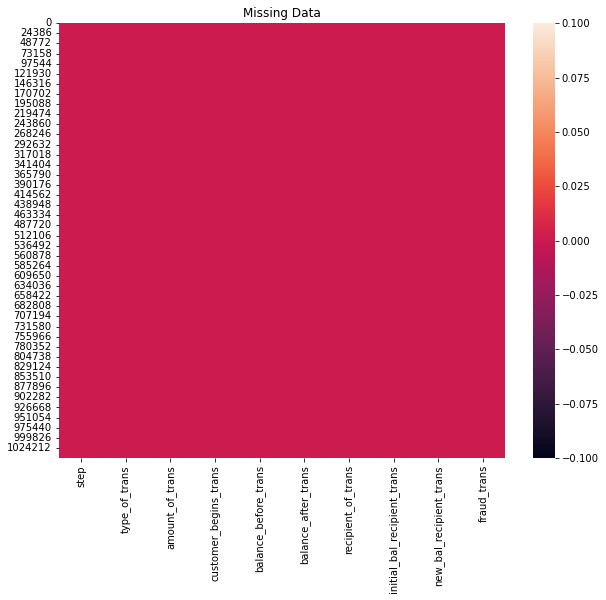

In [11]:
# visualise for missing values

plt.figure(figsize=(10,8))
plt.title('Missing Data')
sns.heatmap(bank_fraud_data.isnull())

### Observation

 - The source of the data is a csv file
 
  
 - The data consists of 1048575 rows and 10 columns
 

 - The data has no missing values

In [12]:
# descriptive analysis

bank_fraud_data.describe().astype(int)


,step,amount_of_trans,balance_before_trans,balance_after_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [13]:
# Checking Correlation 

bank_fraud_data.corr()

,step,amount_of_trans,balance_before_trans,balance_after_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount_of_trans,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
balance_before_trans,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
balance_after_trans,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
initial_bal_recipient_trans,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
new_bal_recipient_trans,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
fraud_trans,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


<AxesSubplot:>

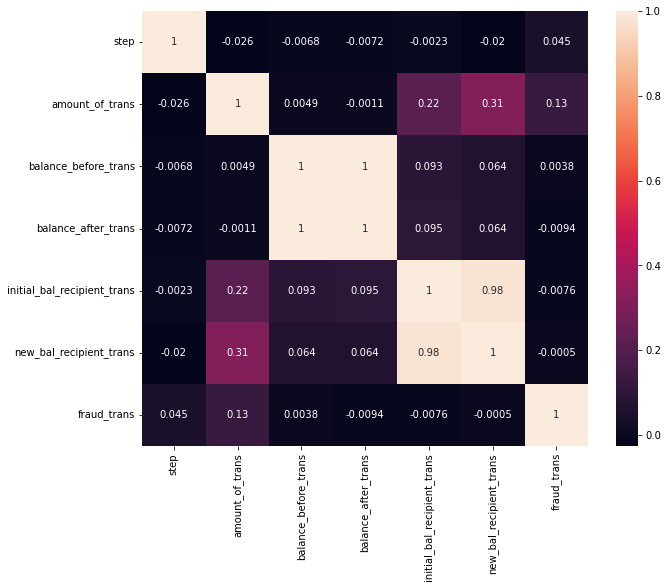

In [14]:
# Correlation using heat map

plt.figure(figsize=(10,8))
sns.heatmap(bank_fraud_data.corr(), annot=True)

#### Strong correlation exist between initial_bal_recipent and new_bal_receipent
#### Also a postive correlation exist between new_bal_receipent and amount_of_trans

In [15]:
#checking count of isFraud - Fradulent Transactions

bank_fraud_data.fraud_trans.value_counts()

0    1047433
1       1142
Name: fraud_trans, dtype: int64

In [16]:
# Create a function that properly labels fraud_trans

def fraud_transaction(x):
    if x == 1:
        return 'Fraud'
    else:
        return 'Not Fraud'
    

# Create a new column

bank_fraud_data['fraud_trans_status'] = bank_fraud_data['fraud_trans'].apply(fraud_transaction)

In [17]:
bank_fraud_data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


In [18]:
bank_fraud_data.fraud_trans_status.value_counts()

Not Fraud    1047433
Fraud           1142
Name: fraud_trans_status, dtype: int64

Text(0.5, 0, 'Fraud Status')

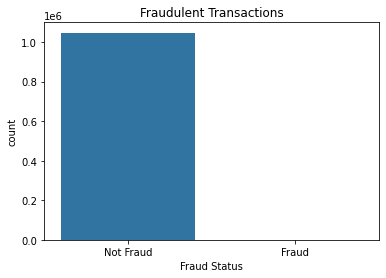

In [19]:
sns.countplot(x=bank_fraud_data['fraud_trans_status'])
plt.title('Fraudulent Transactions')
plt.xlabel('Fraud Status')

In [20]:
Fraud_percentage = (bank_fraud_data['fraud_trans_status'].value_counts()/bank_fraud_data.shape[0]*100).round(2)
Fraud_percentage

Not Fraud    99.89
Fraud         0.11
Name: fraud_trans_status, dtype: float64

<AxesSubplot:title={'center':'Fraudulent Transactions'}, ylabel='fraud_trans_status'>

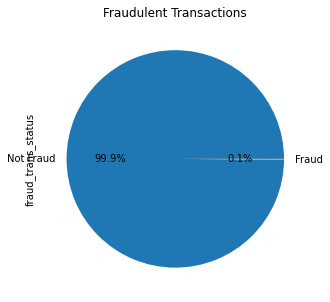

In [21]:
# create visualization

plt.figure(figsize = (10,5))
plt.title ("Fraudulent Transactions")
bank_fraud_data['fraud_trans_status'].value_counts().plot.pie(autopct='%1.1f%%')


##### Of the 1048575 transaction reported, we had a total of 1047433 reported as not fraudulent transaction which is about 99.9% and a 0.1% (1142) fraudulent case.

In [22]:
# Type of Transactions

bank_fraud_data.type_of_trans.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type_of_trans, dtype: int64

In [23]:
bank_fraud_data.type_of_trans.value_counts(normalize=True)

CASH_OUT    0.356332
PAYMENT     0.337480
CASH_IN     0.216608
TRANSFER    0.082734
DEBIT       0.006845
Name: type_of_trans, dtype: float64

<AxesSubplot:title={'center':'Tye of Transactions'}, ylabel='type_of_trans'>

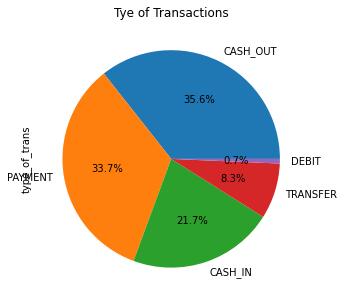

In [24]:
# create visualization

plt.figure(figsize = (10,5))
plt.title ("Tye of Transactions")
bank_fraud_data['type_of_trans'].value_counts().plot.pie(autopct='%1.1f%%')

Text(0.5, 0, 'Trans_Type')

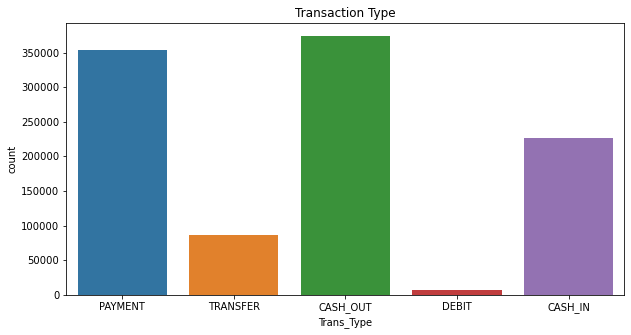

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=bank_fraud_data['type_of_trans'])
plt.title('Transaction Type')
plt.xlabel('Trans_Type')

###### Cash Out transaction type consists of the largest type of transaction with about 36% followed by Payments with 34%.  Debit type consists the lowest fraction with less than 1% of the type of transcations carried out in Blossom bank.

In [26]:
#checking for unique values
for col in bank_fraud_data:
    print(bank_fraud_data[col].nunique())

95
5
1009606
1048317
391033
440792
449635
590110
437054
2
2


In [27]:
bank_fraud_data.columns

Index(['step', 'type_of_trans', 'amount_of_trans', 'customer_begins_trans',
       'balance_before_trans', 'balance_after_trans', 'recipient_of_trans',
       'initial_bal_recipient_trans', 'new_bal_recipient_trans', 'fraud_trans',
       'fraud_trans_status'],
      dtype='object')

In [28]:
# Create a function that properly labels step - represents a unit of time where 1 step equals 1hour for a trasaction to occur


def num_of_hrs(x):
    if x <= 24:
        return '<=1 day'
    elif x <= 48:
        return '<=2 days'
    elif x <= 72:
        return '<=3 days'
    elif x <= 96:
        return '<=4 days'
    else:
        return '>4 days'
    

bank_fraud_data['num_of_hrs'] = bank_fraud_data['step'].apply(num_of_hrs) 
    

In [29]:
bank_fraud_data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status,num_of_hrs
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud,<=1 day
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud,<=1 day
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud,<=1 day
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud,<=1 day
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud,<=1 day


Text(0.5, 1.0, 'Number of hours')

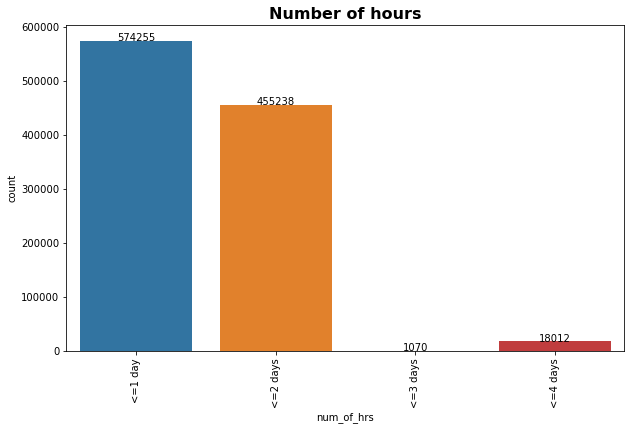

In [30]:
# Display values for each category

fig, ax1 = plt.subplots(figsize = (10,6))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "num_of_hrs", data = bank_fraud_data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Number of hours', weight='bold', fontsize=16)

#### Most transactions were done within 1 day while few transactions took up to 3 days

Text(0.5, 1.0, 'Transaction Amount')

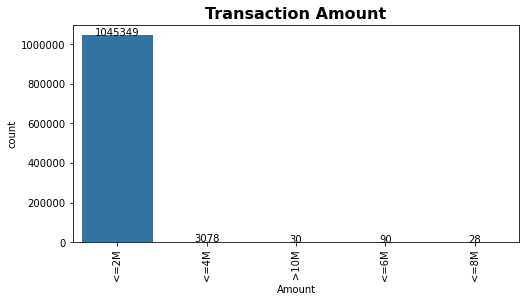

In [31]:
# create a function to group the transaction amount

def Amount(amt):
    if amt <= 2000000:
        return "<=2M"
    elif amt <=4000000:
        return "<=4M"
    elif amt <=6000000:
        return "<=6M"
    elif amt <= 8000000:
        return "<=8M"
    else: 
        return ">10M"    
    

    
bank_fraud_data['Amount'] = bank_fraud_data['amount_of_trans'].apply(Amount) 
    


# Display values for each category

fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "Amount", data = bank_fraud_data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction Amount', weight='bold', fontsize=16)

#### Most transactions amounts were less or equal to 2 Million. Transactions amounts above 6 Million were very minimal 

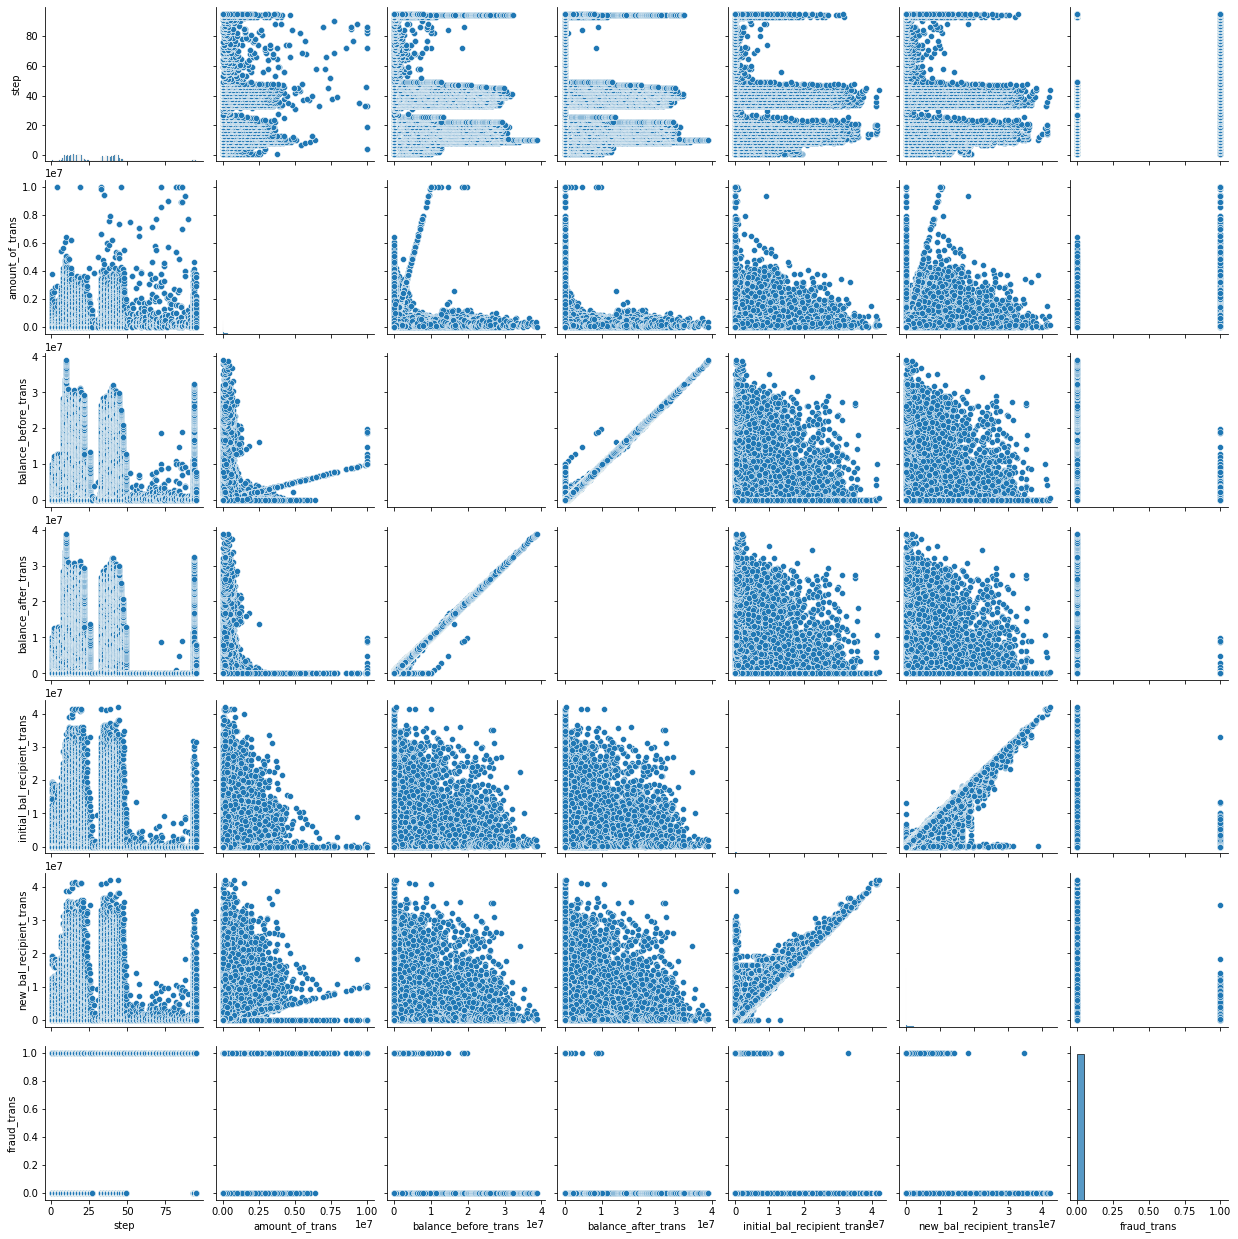

In [32]:
sns.pairplot(bank_fraud_data)

Text(0.5, 0, 'Fraud Status')

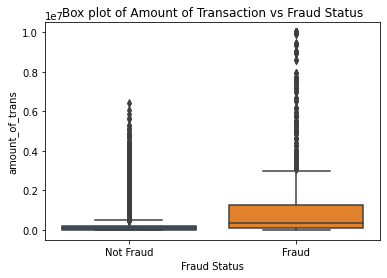

In [33]:
#Bivariate analysis 

sns.boxplot(y=bank_fraud_data['amount_of_trans'], x=bank_fraud_data['fraud_trans_status'])
plt.title('Box plot of Amount of Transaction vs Fraud Status')
plt.xlabel('Fraud Status')

Text(0.5, 0, 'Fraud Status')

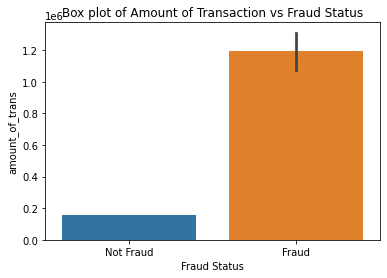

In [34]:
#Bivariate analysis 

sns.barplot(y=bank_fraud_data['amount_of_trans'], x=bank_fraud_data['fraud_trans_status'])
plt.title('Box plot of Amount of Transaction vs Fraud Status')
plt.xlabel('Fraud Status')

#### It can be noticed that the higher amount of transaction/money the more likely the transaction is fraudulent.



Text(0.5, 0, 'Fraud Status')

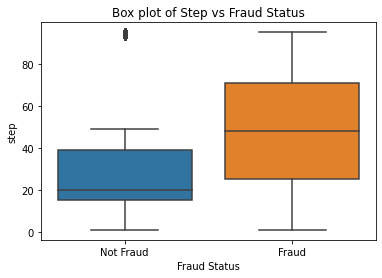

In [35]:
#bivariate analysis cells

sns.boxplot(y=bank_fraud_data['step'], x=bank_fraud_data['fraud_trans_status'])
plt.title('Box plot of Step vs Fraud Status')
plt.xlabel('Fraud Status')

<AxesSubplot:xlabel='type_of_trans', ylabel='step'>

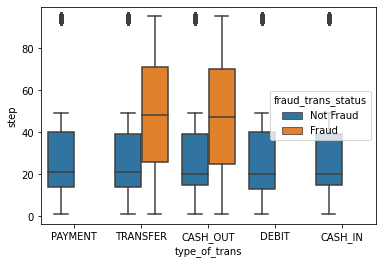

In [36]:
# multivariate analysis cells

sns.boxplot(x='type_of_trans', y='step', hue='fraud_trans_status', data=bank_fraud_data)

<AxesSubplot:xlabel='type_of_trans', ylabel='step'>

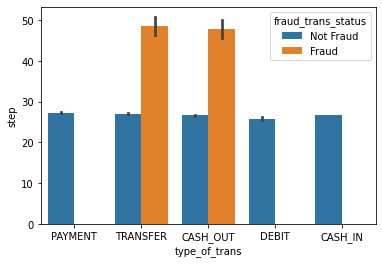

In [37]:
sns.barplot(x='type_of_trans', y='step', hue='fraud_trans_status', data=bank_fraud_data)


Text(0.5, 1.0, 'Amount vs Transaction type vs fraud')

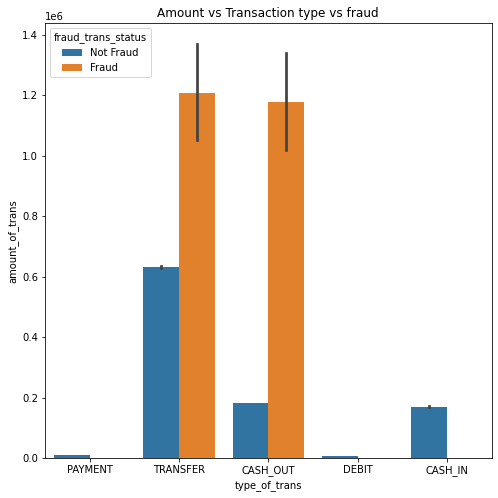

In [38]:

plt.figure(figsize=(8,8))
sns.barplot(y='amount_of_trans', x= 'type_of_trans', hue = 'fraud_trans_status', data = bank_fraud_data)
plt.title( 'Amount vs Transaction type vs fraud')

#### Transfer and Cash Out mode type of transactions consisted the most fraudulent type of transactions


In [39]:
bank_fraud_data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status,num_of_hrs,Amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud,<=1 day,<=2M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud,<=1 day,<=2M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud,<=1 day,<=2M
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud,<=1 day,<=2M
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud,<=1 day,<=2M


<AxesSubplot:xlabel='type_of_trans', ylabel='num_of_hrs'>

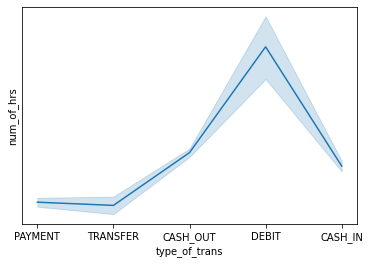

In [40]:
sns.lineplot(x=bank_fraud_data['type_of_trans'], y=bank_fraud_data['num_of_hrs'])

#### Debit type of transactions took the longest duration of time

Text(0, 0.5, 'Count')

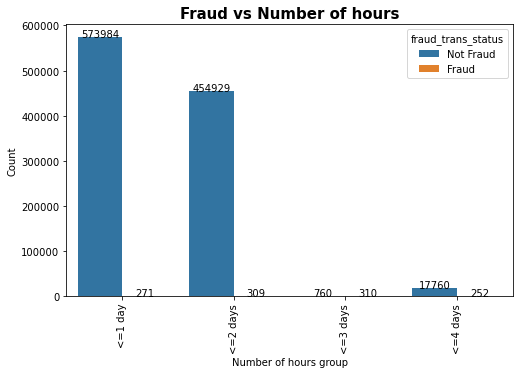

In [41]:
# Fraud vs Number of hours

plt.figure(figsize=(8,5))
plt.title('Fraud vs Number of hours', weight='bold', fontsize=15)
plt.ticklabel_format(style='plain')
viz = sns.countplot(x='num_of_hrs', data= bank_fraud_data, hue='fraud_trans_status')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.xlabel('Number of hours group')
plt.ylabel('Count')

#### Fraudulent transactions ocurred the most when transactions took less than or exactly 2 and 3 days

# Summary of Findings

 - Of the 1048575 transaction reported, we had a total of 1047433 reported as not fraudulent transaction which is about 99.9% and a 0.1% (1142) fraudulent case.
 

 - Cash Out transaction type consists of the largest type of transaction with about 36% followed by Payments with 34%. 
 

 - Transfer and Cash Out mode type of transactions consisted the most fraudulent type of transactions


 - The largest amounts took longer days and were tagged fraudulent transactions

## Modelling

### Select the Target

In [42]:
bank_fraud_data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status,num_of_hrs,Amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud,<=1 day,<=2M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud,<=1 day,<=2M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud,<=1 day,<=2M
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud,<=1 day,<=2M
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud,<=1 day,<=2M


In [43]:
# selecting the target of our model

y = bank_fraud_data.fraud_trans
y.head()

0    0
1    0
2    1
3    1
4    0
Name: fraud_trans, dtype: int64

In [44]:
bank_fraud_data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status,num_of_hrs,Amount
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud,<=1 day,<=2M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud,<=1 day,<=2M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud,<=1 day,<=2M
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud,<=1 day,<=2M
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud,<=1 day,<=2M


In [45]:
# use pd.get_dummies() for one hot encoding

category_dummies = pd.get_dummies(bank_fraud_data['type_of_trans'])

category_dummies.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [46]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both census_data and categories_dummies as a list of their names

bank_fraud_data = pd.concat([bank_fraud_data, category_dummies], axis=1)

print(bank_fraud_data.shape)
bank_fraud_data.head()

(1048575, 18)


,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status,num_of_hrs,Amount,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud,<=1 day,<=2M,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud,<=1 day,<=2M,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud,<=1 day,<=2M,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud,<=1 day,<=2M,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud,<=1 day,<=2M,0,0,0,1,0


In [47]:

#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below
categorical = ['type_of_trans', 'customer_begins_trans', 'recipient_of_trans', 'fraud_trans_status','num_of_hrs', 'Amount' ]
bank_fraud_data = bank_fraud_data.drop(categorical,axis=1)
bank_fraud_data



,step,amount_of_trans,balance_before_trans,balance_after_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,0,1,0


### Select features

In [48]:
y = bank_fraud_data.fraud_trans
X = bank_fraud_data.drop('fraud_trans',axis=1)

In [49]:
print(X.head())
print(y.head())

   step  amount_of_trans  balance_before_trans  balance_after_trans  \
0     1          9839.64              170136.0            160296.36   
1     1          1864.28               21249.0             19384.72   
2     1           181.00                 181.0                 0.00   
3     1           181.00                 181.0                 0.00   
4     1         11668.14               41554.0             29885.86   

   initial_bal_recipient_trans  new_bal_recipient_trans  CASH_IN  CASH_OUT  \
0                          0.0                      0.0        0         0   
1                          0.0                      0.0        0         0   
2                          0.0                      0.0        0         0   
3                      21182.0                      0.0        0         1   
4                          0.0                      0.0        0         0   

   DEBIT  PAYMENT  TRANSFER  
0      0        1         0  
1      0        1         0  
2      0      

### Train Test Split

In [50]:
#split into training and validation sets using a 30% split ratio

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3)

In [51]:
#import ML algorithms and initialise them

LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
models = [LR,KN,DC,RF]


In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

### Train and Test Models

In [54]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_valid,y_valid):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction, y_valid))
    plot_confusion_matrix(y_valid,prediction)

   
    


For LogisticRegression, Accuracy score is 0.999011358253887 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314367
           1       0.35      0.58      0.44       206

    accuracy                           1.00    314573
   macro avg       0.67      0.79      0.72    314573
weighted avg       1.00      1.00      1.00    314573



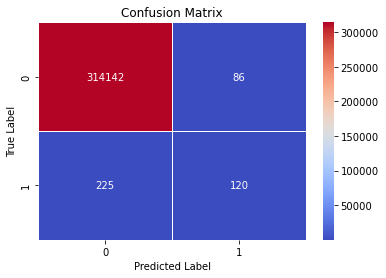


For KNeighborsClassifier, Accuracy score is 0.9993324284029462 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314346
           1       0.52      0.80      0.63       227

    accuracy                           1.00    314573
   macro avg       0.76      0.90      0.82    314573
weighted avg       1.00      1.00      1.00    314573



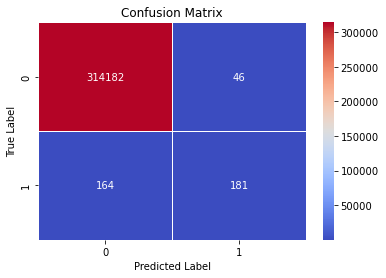


For DecisionTreeClassifier, Accuracy score is 0.9995867413923001 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314228
           1       0.81      0.81      0.81       345

    accuracy                           1.00    314573
   macro avg       0.91      0.91      0.91    314573
weighted avg       1.00      1.00      1.00    314573



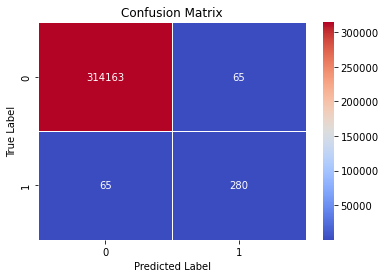


For RandomForestClassifier, Accuracy score is 0.9997838339590492 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314284
           1       0.82      0.98      0.89       289

    accuracy                           1.00    314573
   macro avg       0.91      0.99      0.95    314573
weighted avg       1.00      1.00      1.00    314573



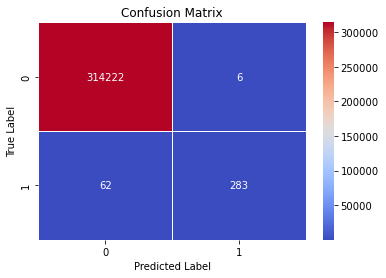

In [55]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)

### Observations

#### The accuracy scores of the models are high signifying an imbalance in our dataset or target class
#### Accuracy scores are as follows: 
 - LR = 0.9990
 - KNN = 0.9993
 - DTC = 0.9995
 - RF = 0.9997

#### Random Forest Classifier shows the highest performance and its the best model for this project is the Random Forest due to the fact that it has a Recall value of 98% and a precision of 82%. 



### Feature Engineering

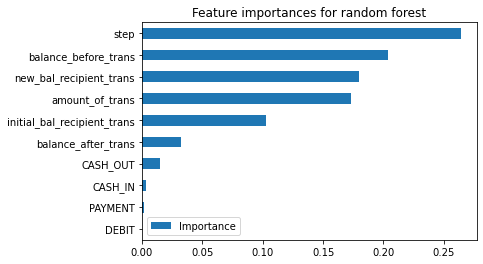

In [56]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [57]:
#create a new X train with only 10 features

X_train2 = X_train[['step', 'balance_before_trans', 'amount_of_trans', 'new_bal_recipient_trans', 'initial_bal_recipient_trans', 
        'balance_after_trans', 'CASH_OUT', 'CASH_IN', 'PAYMENT', 'DEBIT']]

X_train2.head(2)

,step,balance_before_trans,amount_of_trans,new_bal_recipient_trans,initial_bal_recipient_trans,balance_after_trans,CASH_OUT,CASH_IN,PAYMENT,DEBIT
449076,19,56452.08,16088.80,0.0,0.0,40363.28,0,0,1,0
584828,33,0.00,410.15,0.0,0.0,0.00,0,0,1,0


In [58]:
X_valid2 = X_valid[['step', 'balance_before_trans', 'amount_of_trans', 'new_bal_recipient_trans', 'initial_bal_recipient_trans', 
        'balance_after_trans', 'CASH_OUT', 'CASH_IN', 'PAYMENT', 'DEBIT']]

In [59]:
#train and predict
RF.fit(X_train2,y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid))

0.9997774761343154


### Conclusion 

#### Upon training and evaluating our classification model, we found that the Random Forest model performed the best.

